In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import ShuffleSplit

In [17]:
train=pd.read_csv("Predicting-House-Prices-In-Bengaluru-Train-Data.csv")
test=pd.read_csv("Predicting-House-Prices-In-Bengaluru-Test-Data.csv")


In [68]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [5]:
test.shape

(1480, 9)

In [6]:
print(train.describe())

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [7]:
train.shape

(13320, 9)

# Univariate Analysis

In [8]:
train.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [9]:
train.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [10]:
#Data Types of the variables

In [11]:
train.dtypes


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [12]:
train.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

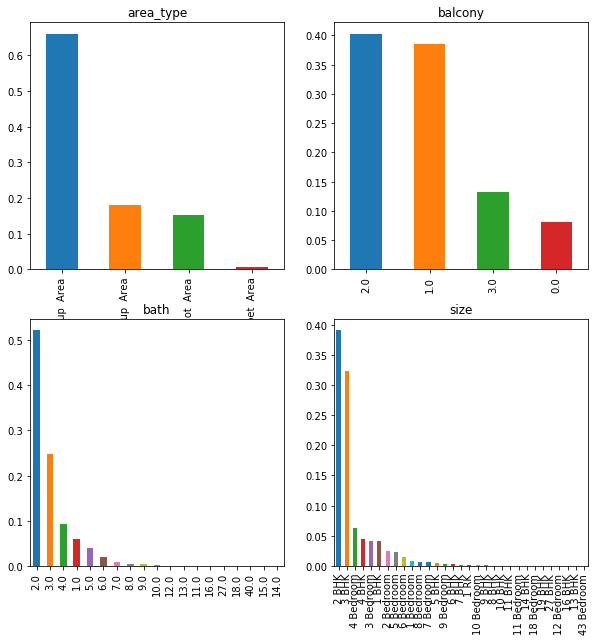

In [13]:
plt.figure()
plt.subplot(221)
train["area_type"].value_counts(normalize=True).plot.bar(figsize=(10,10),title="area_type")
plt.subplot(222)
train["balcony"].value_counts(normalize=True).plot.bar(figsize=(10,10),title="balcony")
plt.subplot(223)
train["bath"].value_counts(normalize=True).plot.bar(figsize=(10,10),title="bath")
plt.subplot(224)
train["size"].value_counts(normalize=True).plot.bar(figsize=(10,10),title="size")

C:\Users\Dipanjan Chowdhury\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

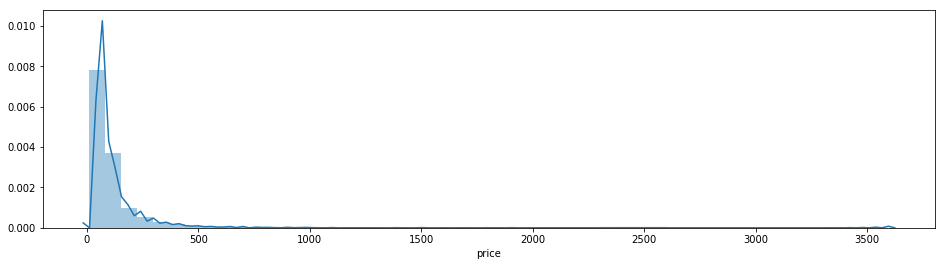

In [14]:
plt.figure(figsize=(16,4))
sns.distplot(train["price"])
train["price"].describe()

# Bivariate Analysis

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
14 BHK           1
18 Bedroom       1
19 BHK           1
27 BHK           1
12 Bedroom       1
16 BHK           1
13 BHK           1
43 Bedroom       1
Name: size, dtype: int64

<Figure size 1152x576 with 0 Axes>

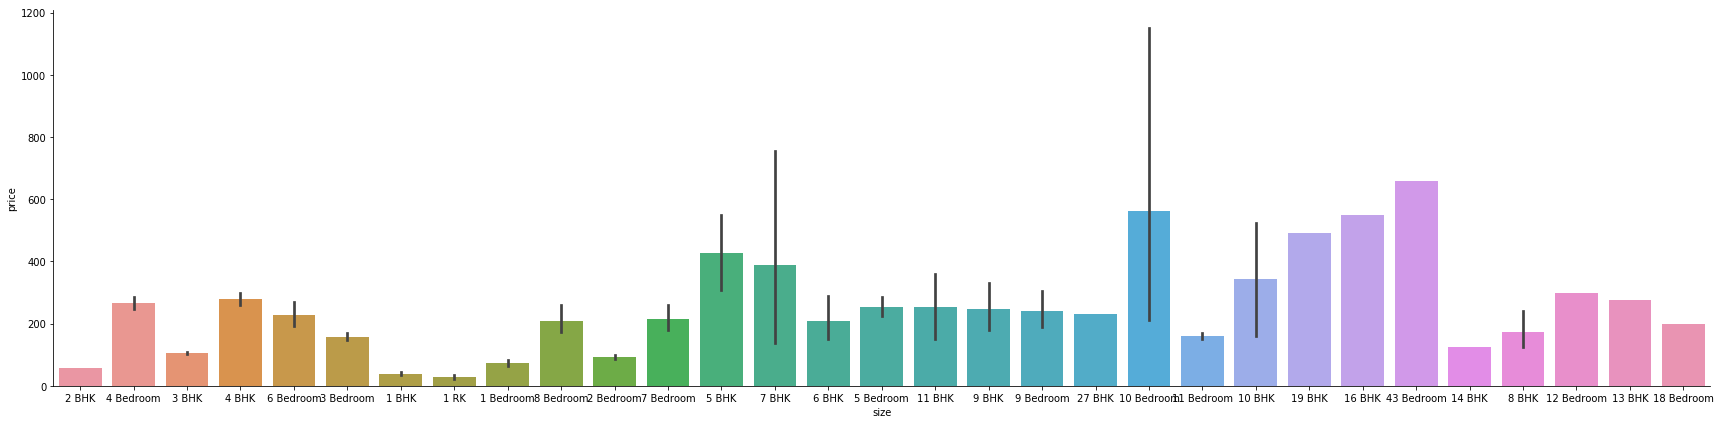

In [15]:
plt.figure(figsize=(16,8))
sns.factorplot('size', 'price', data=train,kind='bar',size=6,aspect=4)
train["size"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

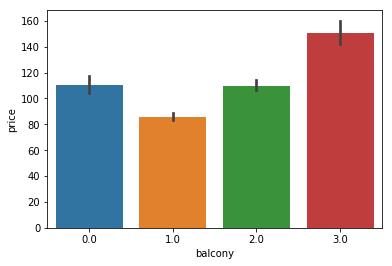

In [16]:
sns.barplot(train["balcony"],train["price"])
train["balcony"].value_counts()

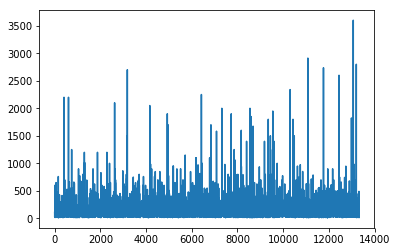

In [17]:
plt.plot(train["price"])

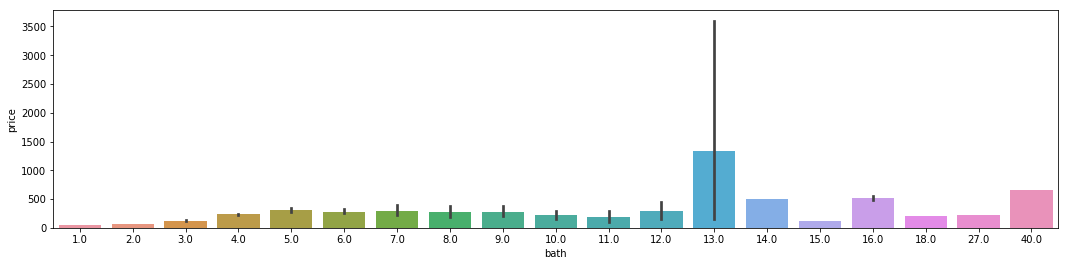

In [18]:
plt.figure(figsize=(18,4))
sns.barplot(train["bath"],train["price"])

# Treating Missing Values

In [3]:
train.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [18]:
train["location"].fillna(train["location"].mode()[0],inplace=True)
train["balcony"].fillna(train["balcony"].mode()[0],inplace=True)
train["size"].fillna(train["size"].mode()[0],inplace=True)
train["bath"].fillna(train["bath"].mode()[0],inplace=True)
train["society"].fillna(train["society"].mode()[0],inplace=True)
train["balcony"].fillna(train["balcony"].mode()[0],inplace=True)

In [5]:
train.isnull().sum()


area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [6]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [19]:
test["balcony"].fillna(test["balcony"].mode()[0],inplace=True)
test["size"].fillna(test["size"].mode()[0],inplace=True)
test["bath"].fillna(test["bath"].mode()[0],inplace=True)
test["society"].fillna(test["society"].mode()[0],inplace=True)


In [8]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1480
dtype: int64

# Data Manupulation

In [20]:
sqft=train.loc[:,["total_sqft"]]
train=train.drop("total_sqft",axis=1)
train.shape
   

(13320, 8)

In [10]:
total_sqft=[]
for s in sqft:
    if not s.isdigit():
        if "Sq. Meter" in s:
            s = s.replace("Sq. Meter","")
            s=str(float(s)*10.764)
        if "Perch" in s:
            s = s.replace("Perch","")
            s=str(float(s)*272.25)
        if "Sq. Yards" in s:
            s = s.replace("Sq. Yards","")
            s=str(float(s)*9)
        if "Acres" in s:
            s = s.replace("Acres","")
            s=str(float(s)*43560)
        if "Cents" in s:
            s = s.replace("Cents","")
            s=str(float(s)*435.6)
        if "Guntha" in s:
            s = s.replace("Guntha","")
            s=str(float(s)*1089)
        if "Grounds" in s:
            s = s.replace("Grounds","")
            s=str(float(s)*2400)
            
    
    if "-" in s:
        x, y = map(float, s.split("-"))
        s = (x + y)/2
   
    total_sqft.append(float(s))

ValueError: could not convert string to float: 'total_sqft'

In [23]:
total_sqft=pd.read_csv("total_sqft.csv")
total_sqft.head()


,0
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0


In [24]:
total_sqft.shape

(13320, 1)

In [25]:
total_sqft_test=pd.read_csv("test_Tsqft.csv")
total_sqft_test.head()

,0
0,1225.0
1,2400.0
2,1650.0
3,1322.0
4,1161.0


In [26]:
total_sqft_test.shape

(1480, 1)

# Plotting Total_Sqft VS Price

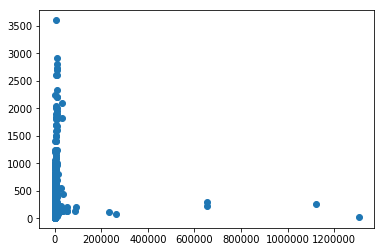

In [161]:
fig, ax = plt.subplots()
ax.scatter(total_sqft, train["price"])


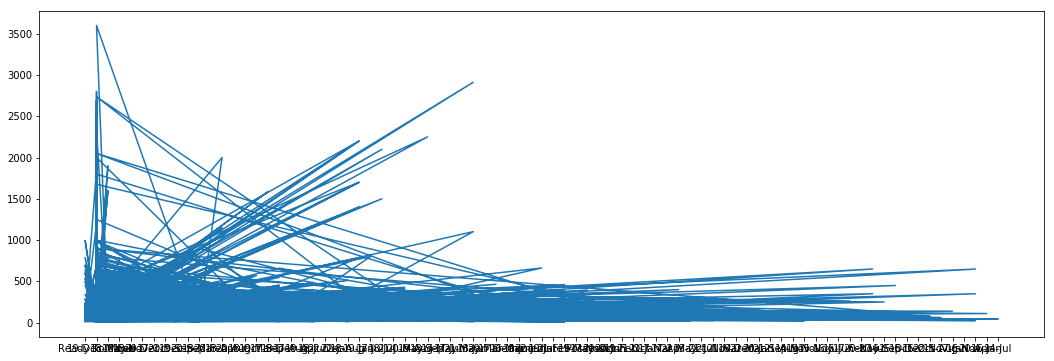

In [162]:
plt.figure(figsize=(18,6))
plt.plot(train["availability"],train["price"])

# creating Dummies of categorical data

In [27]:
print(train["area_type"].nunique())
print(test["area_type"].nunique())

4
4


In [28]:
x1=train.loc[:,["area_type"]]
x1=pd.get_dummies(x1,drop_first=True)
train=train.drop("area_type",axis=1)
x1=pd.DataFrame(x1)
x1.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1


In [29]:
print(train.shape)
print(x1.shape)

(13320, 7)
(13320, 3)


In [30]:
x_1=test.loc[:,["area_type"]]
x_1=pd.get_dummies(x_1,drop_first=True)
test=test.drop("area_type",axis=1)
x_1=pd.DataFrame(x_1)
x_1.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [31]:
print(test.shape)
print(x_1.shape)

(1480, 8)
(1480, 3)


In [167]:
train.head()

,availability,location,size,society,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,GrrvaGr,2.0,1.0,51.00


In [168]:
test.head()

,availability,location,size,society,total_sqft,bath,balcony,price
0,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Ready To Move,Akshaya Nagar,9 Bedroom,Bhmesy,2400,9.0,2.0,NaN
2,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [32]:
y=train.loc[:,["price"]]
train=train.drop("price",axis=1)
train.shape

(13320, 6)

In [33]:
test=test.drop("price",axis=1)
test=test.drop("total_sqft",axis=1)
test.shape

(1480, 6)

In [171]:
print(train["availability"].nunique())
print(test["availability"].nunique())

81
51


In [34]:
train=train.drop("availability",axis=1)
test=test.drop("availability",axis=1)

In [174]:
print(train["size"].nunique())
print(test["size"].nunique())

31
21


In [35]:
train=train.drop("size",axis=1)
test=test.drop("size",axis=1)

In [176]:
print(train["society"].nunique())
print(test["society"].nunique())

2688
594


In [36]:
train=train.drop("society",axis=1)
test=test.drop("society",axis=1)

In [178]:
print(train["location"].nunique())
print(test["location"].nunique())

1305
495


In [37]:
train=train.drop("location",axis=1)
test=test.drop("location",axis=1)

# USELESS

In [39]:
x_2=test.loc[:,["area_type"]]
x_2=pd.get_dummies(x_2,drop_first=True)
test=test.drop("area_type",axis=1)
x_2=pd.DataFrame(x_2)
x_2.head()


,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [40]:
print(test.shape)
print(x_2.shape)

(1480, 7)
(1480, 3)


In [41]:
x3=train.loc[:,["society"]]
x3=pd.get_dummies(x3,drop_first=True)
train=train.drop("society",axis=1)
x3=pd.DataFrame(x3)
x3.head()

,society_7 ise P,society_A idse,society_A rtsai,society_ACersd,society_ACiteda,society_ACopsva,society_AFe 3Ph,society_AGoutLa,society_AHavenc,society_AHodsWo,...,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
print(train.shape)
print(x3.shape)

(13320, 5)
(13320, 2687)


In [43]:
x_3=test.loc[:,["society"]]
x_3=pd.get_dummies(x_3,drop_first=True)
test=test.drop("society",axis=1)
x_3=pd.DataFrame(x_3)
x_3.head()

,society_ARaveSa,society_ARnamru,society_ARntyne,society_AbarkVa,society_Abialri,society_AcisePa,society_Aconyit,society_Adarli,society_Adeatlm,society_Adens G,...,society_VeniaGa,society_Veodsar,society_ViisePa,society_ViistLa,society_Vrenty,society_Winerri,society_Wisic C,society_Xeitaa,society_YMarlti,society_i1rtsCo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
print(test.shape)
print(x_3.shape)

(1480, 6)
(1480, 593)


In [83]:
test=test.drop("price",axis=1)
test=test.drop("total_sqft",axis=1)
test.shape

(1480, 8)

In [47]:
x4=train.loc[:,["location"]]
x4=pd.get_dummies(x4,drop_first=True)
train=train.drop("location",axis=1)
x4=pd.DataFrame(x4)
x4.head()

,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Sector 1 HSR Layout,location_ Thanisandra,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
x_4=test.loc[:,["location"]]
x_4=pd.get_dummies(x_4,drop_first=True)
test=test.drop("location",axis=1)
x_4=pd.DataFrame(x_4)
x_4.head()

,location_ Devarachikkanahalli,location_ Hoodi,location_ Kanakpura Road,location_#NAME?,location_15th Block Hbr Layout,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Block Hbr Layout,location_2nd Block Koramangala,location_2nd Phase JP Nagar,...,location_agara tataguni,location_kanakapura main road,location_kg halli hidayat nagar,location_manyata park,location_nagendra block,location_near ullas theater,location_nynappanahalli,location_soukya road,"location_yelahanka, north",location_yettagodi Road
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
print(train.shape)
print(x4.shape)
print(test.shape)
print(x_4.shape)

(13320, 3)
(13320, 1304)
(1480, 3)
(1480, 494)


In [50]:
x5=train.loc[:,["availability"]]
x5=pd.get_dummies(x5,drop_first=True)
train=train.drop("availability",axis=1)
x5=pd.DataFrame(x5)
x5.head()


,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jan,availability_16-Jul,availability_16-Mar,...,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Immediate Possession,availability_Ready To Move
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
x_5=test.loc[:,["availability"]]
x_5=pd.get_dummies(x_5,drop_first=True)
test=test.drop("availability",axis=1)
x_5=pd.DataFrame(x_5)
x_5.head()

,availability_16-Apr,availability_16-Jul,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-May,availability_17-Nov,...,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_22-Jun,availability_22-May,availability_Immediate Possession,availability_Ready To Move
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Combining all the Features


In [38]:
train=pd.concat([train,x1,total_sqft],axis=1)

In [39]:
train.shape

(13320, 6)

In [182]:
train.head()

,bath,balcony,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,0
0,2.0,1.0,0,0,1,1056.0
1,5.0,3.0,0,1,0,2600.0
2,2.0,3.0,0,0,0,1440.0
3,3.0,1.0,0,0,1,1521.0
4,2.0,1.0,0,0,1,1200.0


In [40]:
test=pd.concat([test,x_1,total_sqft_test],axis=1)


In [41]:
test.head()

,bath,balcony,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,0
0,2.0,2.0,0,0,1,1225.0
1,9.0,2.0,0,1,0,2400.0
2,5.0,2.0,0,1,0,1650.0
3,3.0,1.0,0,0,1,1322.0
4,2.0,1.0,0,0,1,1161.0


# Correlation of the data 

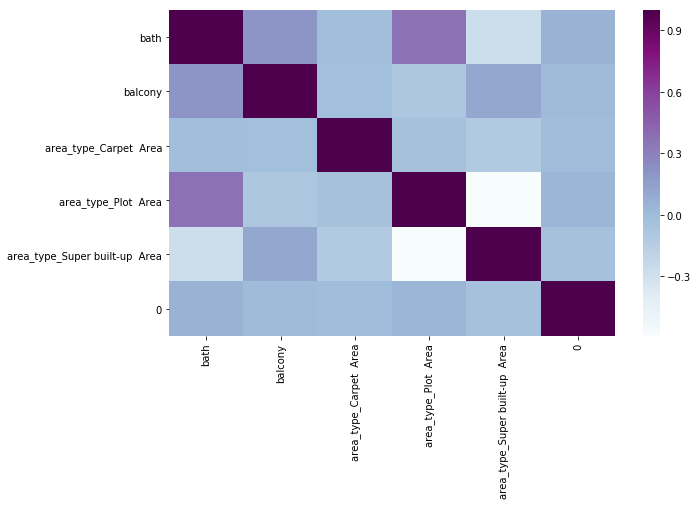

In [188]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(matrix,vmax=1,cmap="BuPu")

In [71]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(train)
scalery = StandardScaler().fit(y)
X_train = scalerX.transform(train)
y_train = scalery.transform(y)
X_test = scalerX.transform(test)



In [51]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

In [43]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\Dipanjan Chowdhury\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [62]:
# Import RandomizedSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None, random_state=42) 

# Create new similar function
def fit_model_2(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_

In [48]:
from sklearn.grid_search import RandomizedSearchCV

# Create new similar function
def fit_model_3(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = linear_model.SGDRegressor(loss='squared_loss', penalty=None, random_state=42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10

    params = {"alpha":[0.0001,0.001,0.01,0.0002,0.002],
             "epsilon":[0.1,0.2,0.4],
             "verbose":[0,10,100],
             "pow_t":[0.25,0.50],
             "eta0":[0.1,0.01,0.02,0.04,0.2]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_

NameError: name 'train_and_evaluate' is not defined

In [78]:
reg = fit_model_2(train,y)


In [79]:
reg.get_params()

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [80]:
y_pred=reg.predict(test)

In [81]:
y_pred_scaled=scalery.inverse_transform(y_pred)

In [82]:
y_pred_scaled=pd.DataFrame(y_pred_scaled)

In [83]:
y_pred_scaled.head()

,0
0,10971.430679
1,51248.815063
2,25324.902021
3,13451.520891
4,7771.579678


In [208]:
y_pred_scaled["price"]=y_pred_scaled.drop([0],axis=1)

In [210]:
y_pred_scaled.head()

,0,price
0,72.894883,72.894883
1,343.274448,343.274448
2,169.248839,169.248839
3,89.543573,89.543573
4,51.414483,51.414483


In [215]:
y_pred_scaled["price"]

0        72.894883
1       343.274448
2       169.248839
3        89.543573
4        51.414483
5        89.543573
6       362.866505
7        51.414483
8        89.543573
9       244.452309
10       89.543573
11       89.543573
12      244.452309
13       51.414483
14       89.543573
15      343.274448
16       38.975885
17       51.414483
18       51.414483
19      343.274448
20       51.414483
21      133.438468
22       38.975885
23       72.894883
24      133.438468
25      133.438468
26       89.543573
27       89.543573
28       72.894883
29      133.438468
           ...    
1450     51.414483
1451    598.062500
1452     72.894883
1453     72.894883
1454     51.414483
1455     89.543573
1456     72.894883
1457     72.894883
1458    244.452309
1459     89.543573
1460     72.894883
1461     72.894883
1462     51.414483
1463     72.894883
1464     51.414483
1465    133.438468
1466    105.448544
1467     72.894883
1468     51.414483
1469    169.248839
1470     51.414483
1471    133.

In [ ]:
y

In [201]:
submission=pd.read_csv("Predicting-House-Prices-In-Bengaluru-Test-Data.csv")

In [216]:
submission=submission.drop("price",axis=1)


KeyError: "labels ['price'] not contained in axis"

In [217]:
submission=pd.concat([submission,y_pred_scaled["price"]],axis=1)
submission.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,72.894883
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,343.274448
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,169.248839
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,89.543573
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,51.414483


In [218]:
submission.to_excel("submission.xlsx",header=True,index=False)